In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/HR.csv')

## remove outlier
df = df.dropna(axis=0, how='any')
df = df[df['last_evaluation']<=1][df['salary']!='nme'][df['department']!='sale']

/Users/shiyuwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [3]:
sns.set_context(font_scale=1.5)

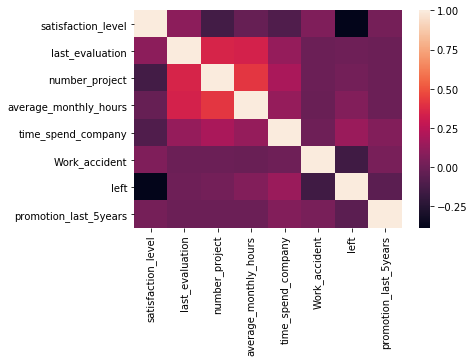

In [4]:
## when count correlation value, the discrete value will be ignored.
sns.heatmap(df.corr())
plt.show()

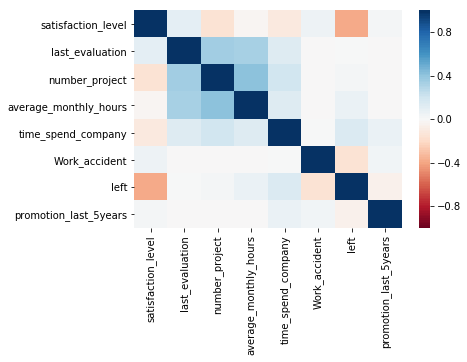

In [5]:
## set the color
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.color_palette('RdBu', n_colors=128))
plt.show()

Example:
<table>
        <tr>
            <td>A</td>
            <td>B</td>
        </tr>
        <tr>
            <td>X1</td>
            <td>Y1</td>
        </tr>
        <tr>
            <td>X1</td>
            <td>Y1</td>
        </tr>
        <tr>
            <td>X2</td>
            <td>Y1</td>
        </tr>
        <tr>
            <td>X2</td>
            <td>Y2</td>
        </tr>
        <tr>
            <td>X2</td>
            <td>Y2</td>
        </tr>
        <tr>
            <td>X2</td>
            <td>Y2</td>
        </tr>
    </table>

In [6]:
s1 = pd.Series(["X1", "X1", "X2", "X2", "X2", "X2"])
s2 = pd.Series(["Y1", "Y1", "Y1", "Y2", "Y2", "Y2"])

In [7]:
def getEntropy(s):
    if not isinstance(s, pd.core.series.Series):
        s=pd.Series(s)
    prt_ary = s.groupby(by=s).count().values / float(len(s))
    return -(np.log2(prt_ary)*prt_ary).sum()

In [8]:
getEntropy(s1)

0.9182958340544896

In [9]:
def getCondEntropy(s1, s2):
    d = dict()
    for i in list(range(len(s1))):
        d[s1[i]] = d.get(s1[i], []) + [s2[i]]
    return sum([getEntropy(d[k]) *len(d[k]) / float(len(s1)) for k in d])

In [10]:
print (getCondEntropy(s1,s2))
print (getCondEntropy(s2,s1))

0.5408520829727552
0.4591479170272448


In [11]:
def getEntropyGain(s1, s2):
    return getEntropy(s2) - getCondEntropy(s1, s2)

In [12]:
print (getEntropyGain(s1,s2))
print (getEntropyGain(s2,s1))

0.4591479170272448
0.4591479170272448


In [13]:
def getEntropyGainRatio(s1, s2):
    return getEntropyGain(s1, s2) / getEntropy(s2)

In [14]:
print (getEntropyGainRatio(s1,s2))
print (getEntropyGainRatio(s2,s1))

0.4591479170272448
0.5


In [15]:
import math 
def getDiscreteCorr(s1, s2):
    return getEntropyGain(s1, s2) / math.sqrt(getEntropy(s1) * getEntropy(s2))

In [16]:
print (getDiscreteCorr(s1,s2))
print (getDiscreteCorr(s2,s1))

0.4791387674918639
0.4791387674918639


In [17]:
## Gini

def getProbSS(s):
    if not isinstance(s, pd.core.series.Series):
        s=pd.Series(s)
    prt_ary = s.groupby(by=s).count().values / float(len(s))
    return sum(prt_ary**2)

def getGini(s1, s2):
    d = dict()
    for i in list(range(len(s1))):
        d[s1[i]] = d.get(s1[i], []) + [s2[i]]
    return 1 - sum([getProbSS(d[k]) * len(d[k]) / float(len(s1)) for k in d])

In [18]:
print (getGini(s1,s2))
print (getGini(s2,s1))

0.25
0.2222222222222222
